In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
import time
import networkx.algorithms.community as nx_comm


In [2]:
wiki = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/wiki-Vote.txt",
    sep='\\t',
    skiprows=4,
    names=["start_node", "end_node"],
    header = None,
    engine='python'
)
quantum = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/ca-GrQc.txt",
    sep='\\t',
    skiprows=4,
    names=["start_node", "end_node"],
    header = None,
    engine='python'
)
gnutella = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/p2p-Gnutella08.txt",
    sep='\\t',
    skiprows=4,
    names=["start_node", "end_node"],
    header = None,
    engine='python'
)
facebook = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/facebook_combined.txt",
    sep=" ",
    names=["start_node", "end_node"],
    engine='python'
)
youtube = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/com-youtube.ungraph.txt",
    sep="\\t",
    names=["start_node", "end_node"],
    engine='python'
)

G1 = nx.from_pandas_edgelist(wiki, "start_node", "end_node")
G2 = nx.from_pandas_edgelist(quantum, "start_node", "end_node")
#len(G2.nodes)
G2.remove_node(12295) # remove single node with self-loop, This prevents some issues later. 
#len(G2.nodes)
G3 = nx.from_pandas_edgelist(gnutella, "start_node", "end_node")
G4 = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

# ERROR: NONE CANNOT BE A NODE
# G5 = nx.from_pandas_edgelist(youtube, "start_node", "end_node")

In [3]:
# plot_options = {"node_size": 9, "with_labels": False, "width": 0.15}

G1.graph['color'] = "gold"
G2.graph['color'] = "violet"
G3.graph['color'] = "limegreen"
G4.graph['color'] = "darkorange"
# G5.graph['color'] = "red"

#graphs = [G1, G2, G3, G4, G5]
graphs = [G1, G2, G3, G4]


# fig, axes = plt.subplots(2,3)
# fig.suptitle("Networks of interest", fontsize=16)
# for graph, ax in zip(graphs, axes.ravel()):
#     pos = nx.spring_layout(graph, iterations=15, seed=1721)
#     nx.draw(graph, pos=pos, ax=ax, node_color=graph.graph['color'], **plot_options)
#     ax.axis("off")

# axes[0, 0].set_title('Wikipedia vote')
# axes[0, 1].set_title('Physics collaboration')
# axes[1, 0].set_title('Gnutella peer-to-peer')
# axes[1, 1].set_title('Social circles: Facebook')
# axes[1, 2].set_title('Youtube')
# plt.show()

In [14]:
#load the results (which are all txt files)
load_options = {"sep": '\\t', "names":["Community"], "header":None}

# METIS
metis_cd_wiki = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/Outputs/METIS/wiki-Vote.metis.part.500",
    **load_options
)

metis_cd_quantum = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/Outputs/METIS/ca-GrQc.metis.part.500",
    **load_options
)

metis_cd_gnutella = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/Outputs/METIS/p2p-Gnutella08.metis.part.500",
    **load_options
)
metis_cd_facebook = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/Outputs/METIS/facebook_combined.metis.part.500",
    **load_options
)
metis_communities = [metis_cd_wiki,metis_cd_quantum,metis_cd_gnutella,metis_cd_facebook]

/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_40520/349345254.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metis_cd_wiki = pd.read_csv(


FileNotFoundError: [Errno 2] No such file or directory: '/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/Outputs/METIS/wiki-Vote.metis.part.100'

In [21]:
#mlrmcl
mlrmcl_cd_wiki = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/Outputs/MLR-MCL/wiki-Vote.c10000.out",
    **load_options
)

mlrmcl_cd_quantum = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/Outputs/MLR-MCL/ca-GrQc.c10000.out",
    **load_options
)

mlrmcl_cd_gnutella = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/Outputs/MLR-MCL/p2p-Gnutella08.c10000.out",
    **load_options
)
mlrmcl_cd_facebook = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/Outputs/MLR-MCL/facebook_combined.c10000.out",
    **load_options
)
mlrmcl_communities = [mlrmcl_cd_wiki,mlrmcl_cd_quantum,mlrmcl_cd_gnutella,mlrmcl_cd_facebook]

/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_40520/1581916726.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  mlrmcl_cd_wiki = pd.read_csv(
/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_40520/1581916726.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  mlrmcl_cd_quantum = pd.read_csv(
/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_40520/1581916726.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning 

In [22]:
load_options = {"sep": '\\t', "names":["Community"], "header":None, "skiprows": 6}

#Clauset-Newman-Moore
cnm_cd_wiki = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/Outputs/CNM/wiki-Vote-CNM.txt",
    **load_options
)

cnm_cd_quantum = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/Outputs/CNM/ca-GrQc-CNM.txt",
    **load_options
)

cnm_cd_quantum = cnm_cd_quantum[cnm_cd_quantum.index != 12295] #just remove the node from the analysis

cnm_cd_gnutella = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/Outputs/CNM/p2p-Gnutella08-CNM.txt",
    **load_options
)
cnm_cd_facebook = pd.read_csv(
    "/Users/macbook/Desktop/Network-Science/Lab2-5245/CSE5245ForStudents/data/Outputs/CNM/facebook_combined-CNM.txt",
    **load_options
)
cnm_communities = [cnm_cd_wiki,cnm_cd_quantum,cnm_cd_gnutella,cnm_cd_facebook]

/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_40520/1251714574.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  cnm_cd_wiki = pd.read_csv(
/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_40520/1251714574.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  cnm_cd_quantum = pd.read_csv(
/var/folders/hs/y116vr4j4yg5fcthw_l99c5r0000gn/T/ipykernel_40520/1251714574.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by spe

In [23]:
#A list of frozensets of nodes, one for each community. Sorted by length with largest communities first.
def convert_communities(G, communities):
    """
    Converts list output to A list of frozensets of nodes, one for each community. Sorted by length with largest communities first (i.e. the input that Networkx functions take)
    Parameters
    ----------
    G : NetworkX Graph

    communities : the Dataframe from containing the output from the community detection algo

    method : an integer to indicate which community detection method results are being converted

    Returns
    -------
    cres : list
       A list of frozensets of nodes, one for each community. Sorted by length with largest communities first.
    """
    communities_temp = communities.copy()
    cres = []
    temp = communities.value_counts()
    
    communities_temp['Node_id'] = G.nodes #for the output fromt the gpmetis | mlrmcl
    # if method == 1:
    #     communities_temp['Node_id'] = G.nodes #for the output fromt the gpmetis | mlrmcl
    # else: 
    #     communities_temp['Node_id'] = communities.index.values #for the CNM

    for com in np.concatenate(np.array(temp.index.values)):
        com_temp = [communities_temp[communities_temp['Community'] == com]['Node_id'].values]
        fnum = frozenset(set(com_temp[0]))
        cres.append(fnum)
    return cres

In [24]:
#get modularity of the graphs
comms1 = list(map(convert_communities, graphs, metis_communities))
comms2 =list(map(convert_communities, graphs, mlrmcl_communities))
comms3 =list(map(convert_communities, graphs, cnm_communities))

# comms3 = [convert_communities(g, c, method = 2) for g in graphs for c in cnm_communities]

mod_res1 = list(map(nx_comm.modularity, graphs, comms1))
mod_res2 = list(map(nx_comm.modularity, graphs, comms2))
mod_res3 = list(map(nx_comm.modularity, graphs, comms3))

           gpmetis  mlrmcl    cnm
Wikipedia    0.002   0.000  0.024
Physics      0.001   0.000  0.426
Gnutella     0.006   0.002  0.099
Facebook     0.010   0.260  0.394


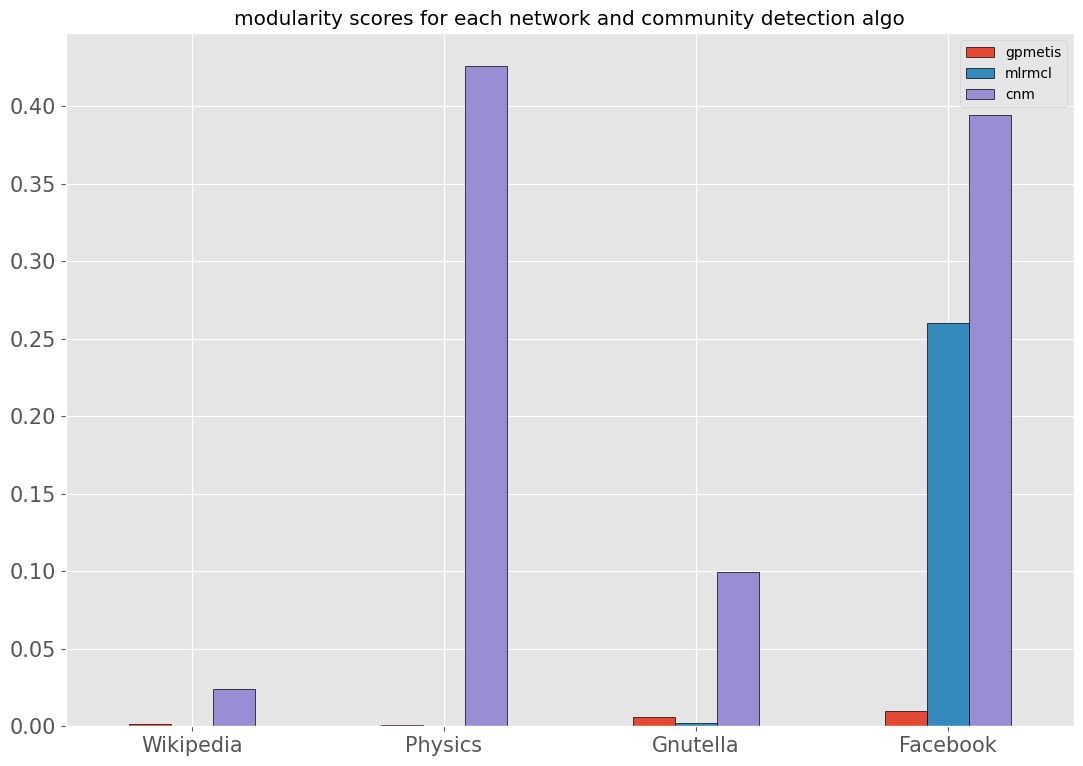

In [25]:
# TODO we want a barplot wiht modulariy for each of the algos and for each of the graphs
        #so it will have modularity on y and algo on x with 5 bars for each of the three algos

# Split the DataFrame into four columns, taking 5 elements at a time
df1 = pd.DataFrame(mod_res1, columns=['gpmetis'])
df2 = pd.DataFrame(mod_res2, columns=['mlrmcl'])
df3 = pd.DataFrame(mod_res3, columns=['cnm'])

# Concatenate the four columns into a new DataFrame
result = pd.concat([df1, df2, df3], axis=1)

# Rename the columns as desired
# result.columns = ['gpmetis', 'mlrmcl', 'cnm']
result.index = ['Wikipedia', 'Physics', 'Gnutella', 'Facebook']
print(result.round(3))

ax = result.plot.bar(rot = 0, figsize =(13, 9), title = 'modularity scores for each network and community detection algo',fontsize = 15,edgecolor ='black')

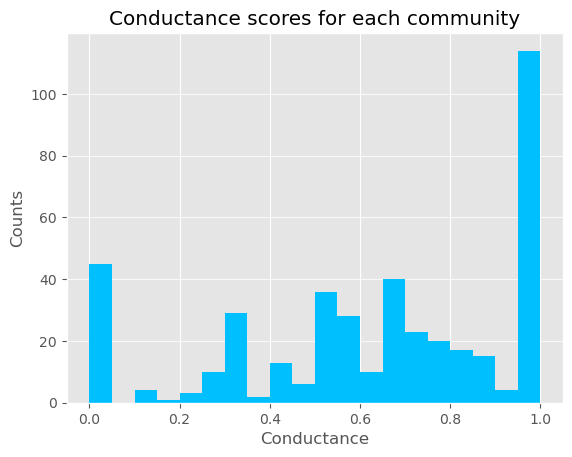

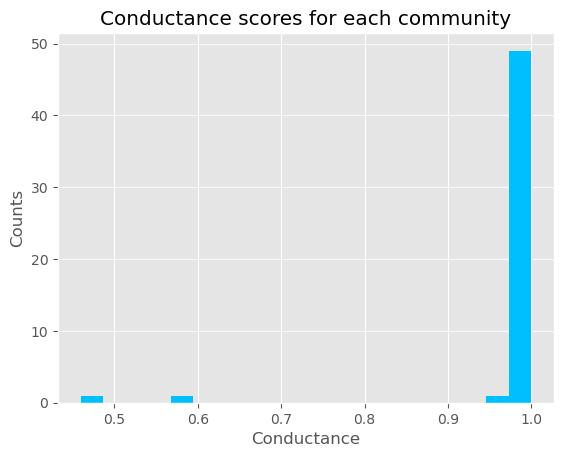

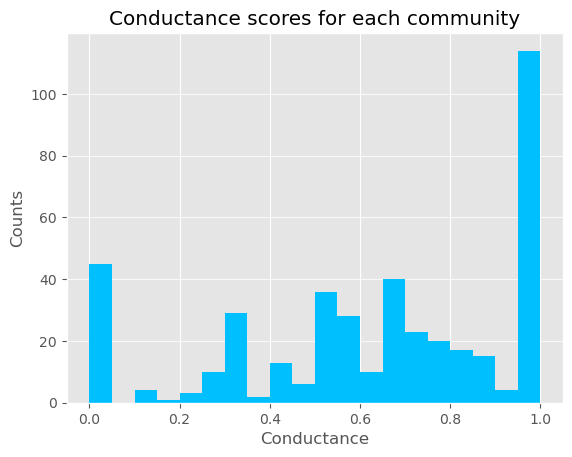

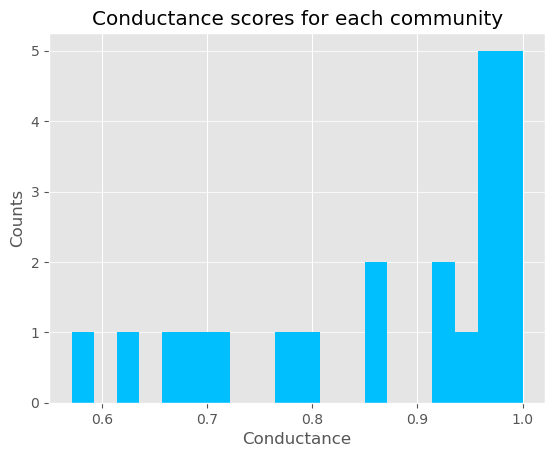

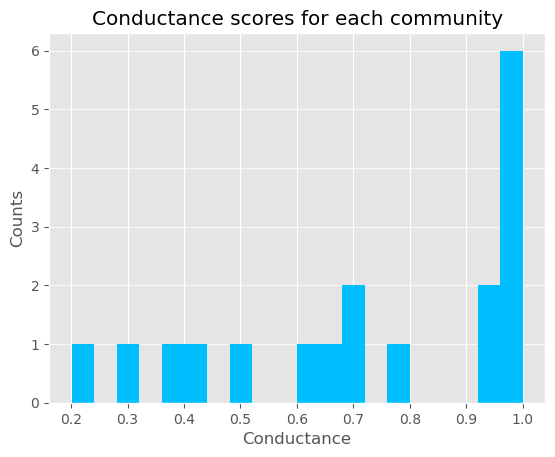

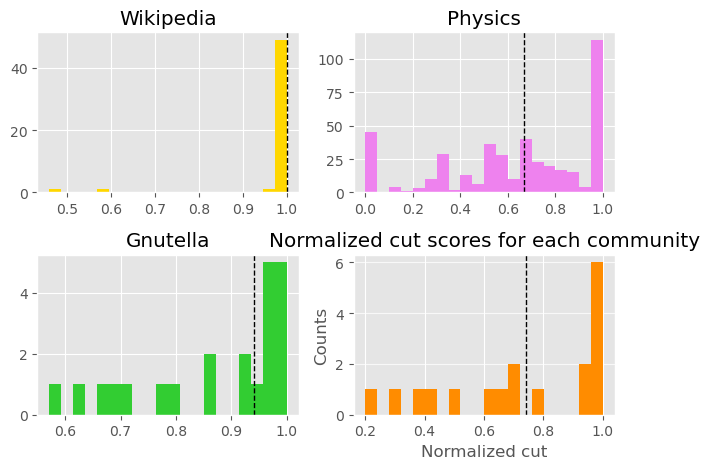

In [13]:
comms1

def conductance_scores(g, c, plot = True):
    c =  convert_communities(g,c)
    #how to get the conductance for all the communities
    conductance_scores_temp = [nx.conductance(g,communities_i, weight='weight') for communities_i in c]
    if plot == True:
        pd.Series(conductance_scores_temp).plot.hist(grid=True, bins=20, color='deepskyblue')
        plt.title('Conductance scores for each community')
        plt.xlabel('Conductance')
        plt.ylabel('Counts')
        plt.style.use('ggplot')
        plt.grid(axis='y', alpha=0.75)
        plt.show()
    return conductance_scores_temp

conductance_scores(G2, cnm_cd_quantum)

n_bins = 20

# Generate two normal distributions
dist1 = conductance_scores(G1, cnm_cd_wiki)
dist2 = conductance_scores(G2, cnm_cd_quantum)
dist3 = conductance_scores(G3, cnm_cd_gnutella)
dist4 = conductance_scores(G4, cnm_cd_facebook)

fig, axs = plt.subplots(2, 2, tight_layout=True)
# We can set the number of bins with the *bins* keyword argument.
axs[0,0].hist(dist1, bins=n_bins, color='gold')
axs[0,0].axvline(np.median(dist1), color='k', linestyle='dashed', linewidth=1)
axs[0,0].set_title('Wikipedia')
axs[0,1].hist(dist2, bins=n_bins, color='violet')
axs[0,1].axvline(np.median(dist2), color='k', linestyle='dashed', linewidth=1)
axs[0,1].set_title('Physics')
axs[1,0].hist(dist3, bins=n_bins, color='limegreen')
axs[1,0].axvline(np.median(dist3), color='k', linestyle='dashed', linewidth=1)
axs[1,0].set_title('Gnutella')
axs[1,1].hist(dist4, bins=n_bins, color='darkorange')
axs[1,1].axvline(np.median(dist4), color='k', linestyle='dashed', linewidth=1)
axs[1,1].set_title('Facebook')

#np.mean(conductance_scores)

plt.title('Normalized cut scores for each community')
plt.xlabel('Normalized cut')
plt.ylabel('Counts')
plt.style.use('ggplot')
plt.grid(axis='y', alpha=0.75)